In [1]:
# Import python libraries 
import pandas as pd
import glob     
import numpy
import matplotlib.pyplot

In [2]:
# Use glob to match the pattern ‘csv’
filenames = glob.glob('resale-flat-prices*.csv')
filenames = filenames[0:]

In [3]:
# Combine all files in the list and export as CSV
combined_csv = pd.concat([pd.read_csv(f) for f in filenames])
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [4]:
# Read the combined csv file
df = pd.read_csv("combined_csv.csv")

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Get the first 5 observations
df.head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,9000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
1,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO
2,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,8000.0,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
3,309,IMPROVED,1 ROOM,31.0,1977,1990-01,NaN,6000.0,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO
4,216,NEW GENERATION,3 ROOM,73.0,1976,1990-01,NaN,47200.0,04 TO 06,ANG MO KIO AVE 1,ANG MO KIO


In [6]:
# Get the number of observations in the data frame
len(df)

800631

In [7]:
# Observe the number of NA values in each column
df.isna().sum()

block                       0
flat_model                  0
flat_type                   0
floor_area_sqm              0
lease_commence_date         0
month                       0
remaining_lease        709054
resale_price                0
storey_range                0
street_name                 0
town                        0
dtype: int64

In [8]:
# Check how many observations are without NA values
len(df.dropna())

91577

In [9]:
# Get first 5 observations without NA values
df.dropna().head()

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
656851,174,Improved,3 ROOM,60.0,1986,2015-01,70,255000.0,07 TO 09,ANG MO KIO AVE 4,ANG MO KIO
656852,541,New Generation,3 ROOM,68.0,1981,2015-01,65,275000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO
656853,163,New Generation,3 ROOM,69.0,1980,2015-01,64,285000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO
656854,446,New Generation,3 ROOM,68.0,1979,2015-01,63,290000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO
656855,557,New Generation,3 ROOM,68.0,1980,2015-01,64,290000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO


Things to take note:
    1. Variable remaining_lease has NA values
    2. There are 91577 observations with complete cases i.e. rows without NA values

In [10]:
# Observe the dtypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800631 entries, 0 to 800630
Data columns (total 11 columns):
block                  800631 non-null object
flat_model             800631 non-null object
flat_type              800631 non-null object
floor_area_sqm         800631 non-null float64
lease_commence_date    800631 non-null int64
month                  800631 non-null object
remaining_lease        91577 non-null object
resale_price           800631 non-null float64
storey_range           800631 non-null object
street_name            800631 non-null object
town                   800631 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 67.2+ MB


We have 3 data types imported:
    1. object (for string characters) - 8 variables
    2. float64 (for numerical float values) - 2 variables
    3. int64 (for numerical integer values) - 1 variable

In [11]:
# Observe statistics for numerical variables
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,800631.000000,800631.000000,8.006310e+05
mean,95.511540,1986.870380,2.888747e+05
std,26.108643,9.138722,1.463001e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1980.000000,1.785000e+05
50%,93.000000,1985.000000,2.700000e+05
75%,114.000000,1993.000000,3.780000e+05
max,307.000000,2016.000000,1.205000e+06


Things to take note:
    1. Variable lease_commence_date is wrongly imported as a 'int' dtype

In [12]:
# Observe the count of each category for the `flat_type` category
df['flat_type'].value_counts()

4 ROOM              298542
3 ROOM              266353
5 ROOM              163989
EXECUTIVE            60652
2 ROOM                9337
1 ROOM                1264
MULTI GENERATION       279
MULTI-GENERATION       215
Name: flat_type, dtype: int64

In [13]:
# Make a list containing the names of variables (columns) with 'object' dtype

obj_colnames = list(df.loc[:,df.dtypes == object])
print (obj_colnames)

['block', 'flat_model', 'flat_type', 'month', 'remaining_lease', 'storey_range', 'street_name', 'town']


In [14]:
# Examine the categories for each of the supposed categorical variables
for i in obj_colnames:
    print('Categories for column "' + i + '":')
    print(df[i].value_counts())
    print('\n')

Categories for column "block":
2       4233
1       3701
110     3118
101     3089
4       3032
113     3019
8       2980
107     2940
3       2907
114     2894
108     2812
6       2748
109     2716
102     2707
5       2697
105     2640
112     2621
7       2601
111     2593
116     2569
115     2562
103     2543
106     2389
120     2362
124     2350
34      2329
13      2270
210     2242
22      2221
211     2213
        ... 
326D       3
431D       3
470A       3
780F       2
547D       2
226E       2
426C       2
10A        2
432D       2
334A       2
279C       2
523B       2
336B       2
327A       2
868C       2
453D       2
526A       1
527A       1
525C       1
279B       1
431A       1
279A       1
331C       1
453C       1
524A       1
440A       1
329A       1
327B       1
342B       1
519C       1
Name: block, Length: 2342, dtype: int64


Categories for column "flat_model":
Model A                   149056
Improved                  137328
New Generation             95348

In [15]:
# Convert variable `lease_commence_date` to object type
df['lease_commence_date'] = df['lease_commence_date'].astype('object')

In [16]:
# Import 'seaborn' package for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


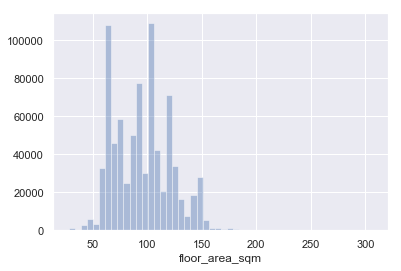

In [17]:
# Plot a simple histogram with binsize determined automatically
sns.distplot(df['floor_area_sqm'],kde = False)
# Save plot example
plt.savefig('chat1.png')

In [18]:
# Observe the correlation coefficients between the different numerical variables
corr = df.corr()
corr

,floor_area_sqm,resale_price
floor_area_sqm,1.000000,0.633224
resale_price,0.633224,1.000000


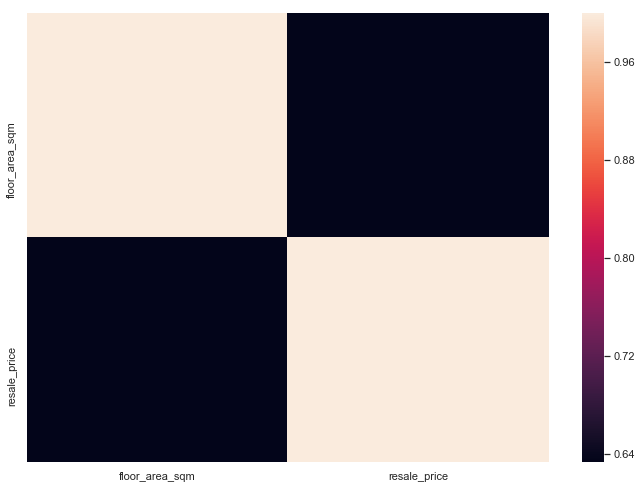

In [19]:
# Set the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
# Plot a heatmap for the correlation coefficients
sns.heatmap(corr)
plt.show()


Performance by Categories (Barplot)

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


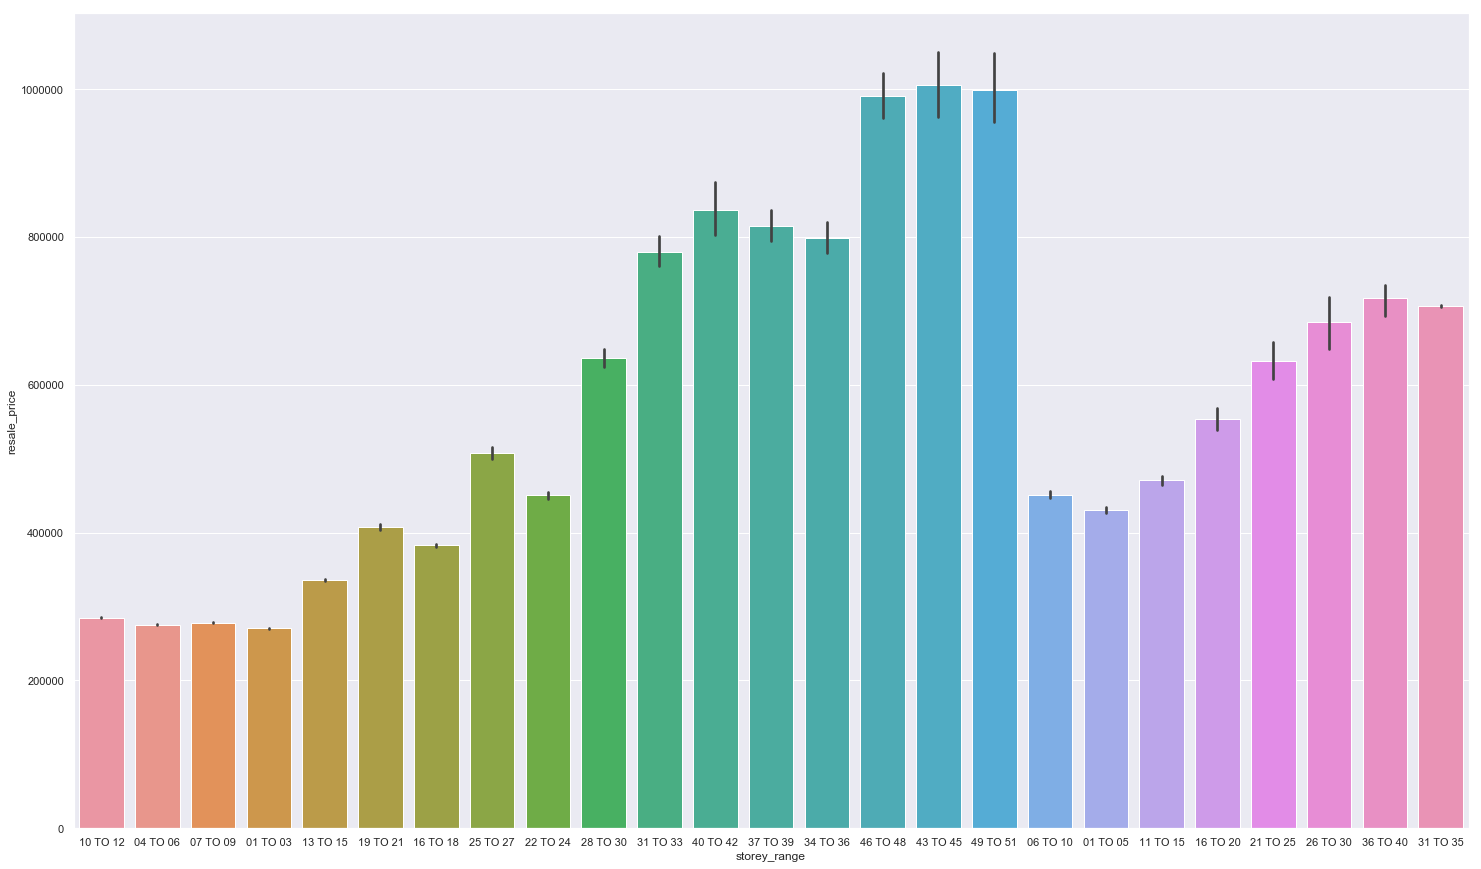

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.barplot(x = 'storey_range', y = "resale_price", data = df)
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


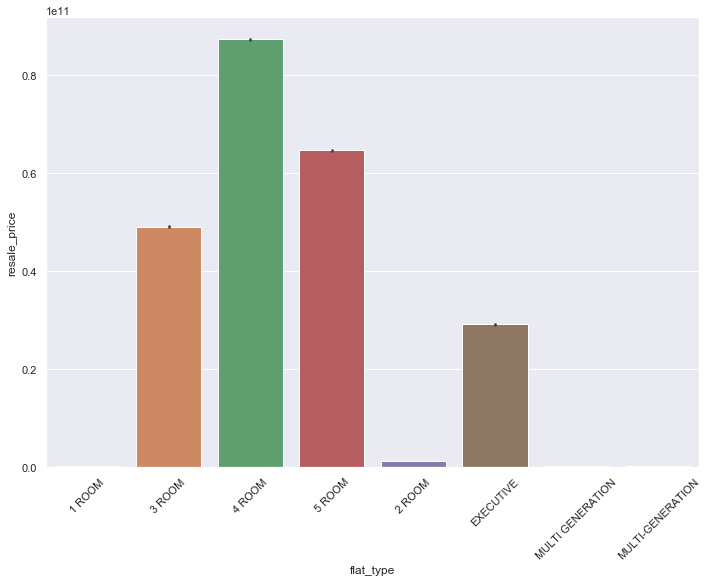

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.barplot(x='flat_type', y='resale_price', data=df, estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

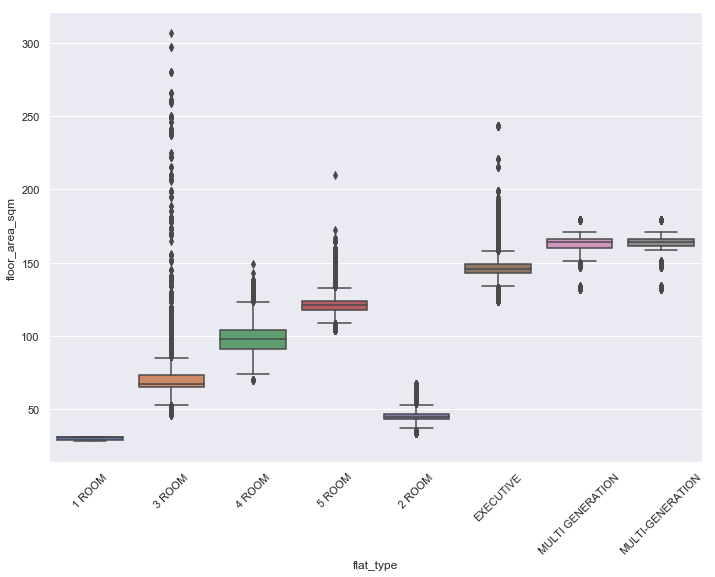

In [22]:
# Set the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='flat_type', y='floor_area_sqm', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


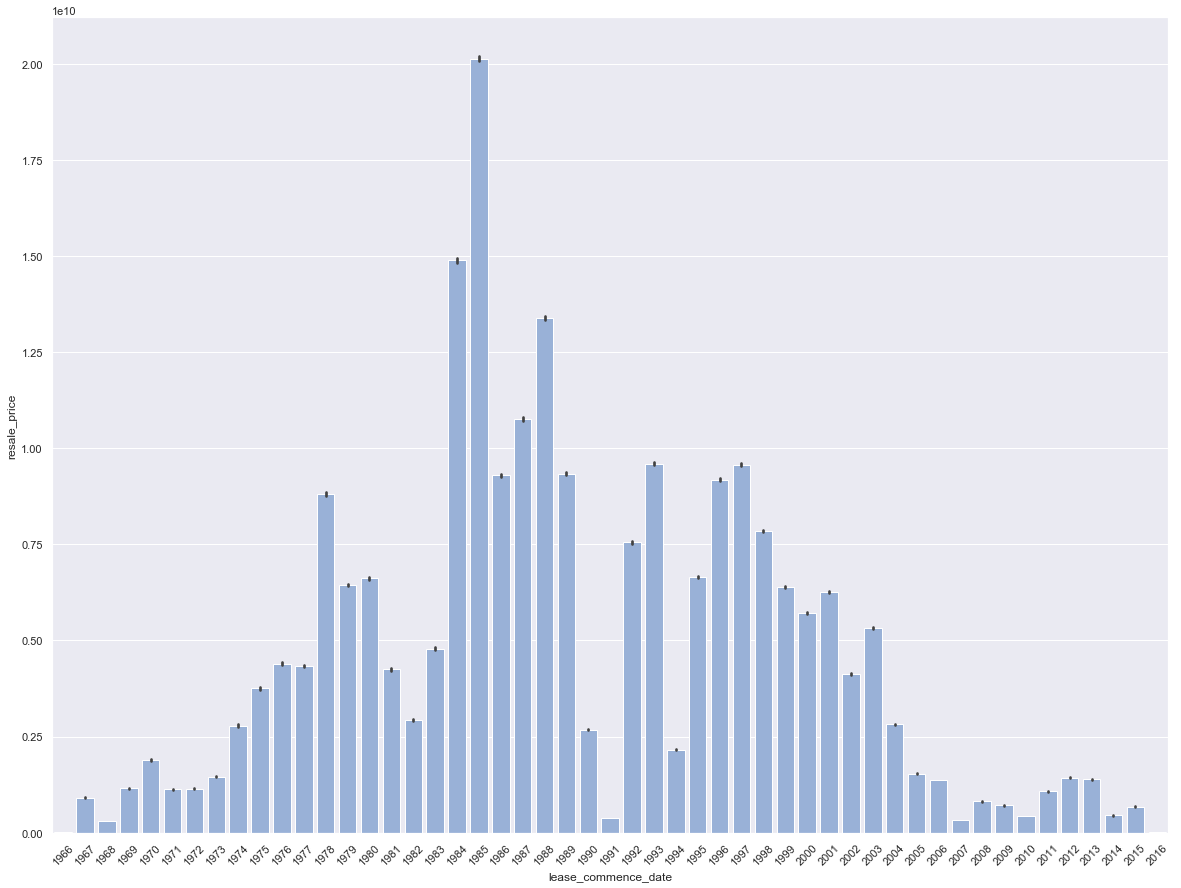

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = sns.barplot(x = 'lease_commence_date', y = 'resale_price', 
                 data = df, estimator = sum, color='#8FAEE1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

In [24]:
# Observing any form of relationship between count of sales and lease_commence_date
df['lease_commence_date'].value_counts()

1985    80502
1984    58190
1988    46318
1987    39206
1978    38008
1986    35425
1980    29532
1989    29310
1979    28357
1997    27538
1993    25559
1996    25253
1998    22486
1983    21265
1976    19622
1981    19112
1977    19089
1992    18188
1999    17663
1995    17098
1975    15887
2001    15867
2000    15411
1974    13376
2003    12542
1982    12188
1970    10446
2002    10108
1990     8472
1973     7904
1969     7765
1971     7333
2004     6673
1994     5872
1967     5633
1972     5322
2005     3055
2012     2792
2013     2692
2006     2324
1968     1735
2015     1556
2011     1489
2008     1455
2009     1195
1991     1124
2014     1088
2010      893
2007      676
1966       24
2016       13
Name: lease_commence_date, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


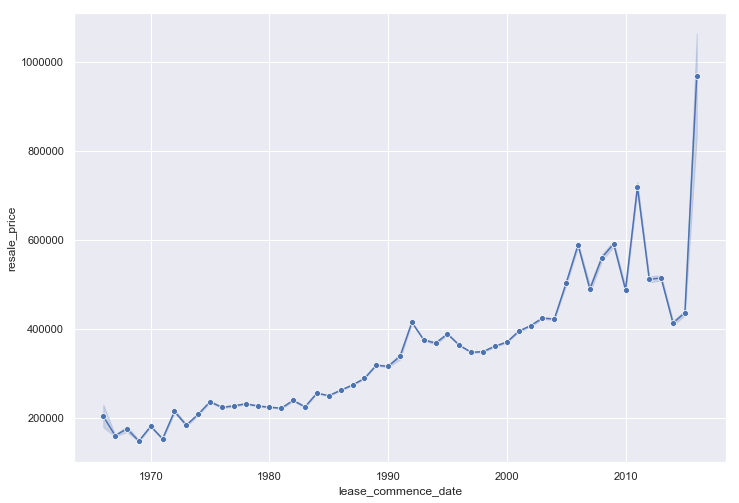

In [25]:
# Constructing a line plot, emulating a time series
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.lineplot(data=df, x='lease_commence_date', y='resale_price', marker='o')
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800631 entries, 0 to 800630
Data columns (total 11 columns):
block                  800631 non-null object
flat_model             800631 non-null object
flat_type              800631 non-null object
floor_area_sqm         800631 non-null float64
lease_commence_date    800631 non-null object
month                  800631 non-null object
remaining_lease        91577 non-null object
resale_price           800631 non-null float64
storey_range           800631 non-null object
street_name            800631 non-null object
town                   800631 non-null object
dtypes: float64(2), object(9)
memory usage: 67.2+ MB
